<a href="https://colab.research.google.com/github/jonatansg/CEIABD/blob/main/Actividad_3_2_%E2%80%93_Comparativa_clasificadores_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autor:** Jonatan Santana González

Utilizando como referencia el cuaderno Ejemplo_3_2_Iris_NaiveBayes - GaussianNB.ipynb, desarrollar la solución con los diferentes clasificadores NaiveBayes, de forma que para un mismo problema podamos comparar las precisiones obtenidas.
Realizar esta comparativa para el Dataset Iris y el Dataset Penguin (por separado)

In [1]:
# Importar librerías
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder, KBinsDiscretizer

# Carga de los datasets
iris = sns.load_dataset('iris')
penguins = sns.load_dataset('penguins').dropna()

# Preprocesamiento para Penguins
X_penguins = penguins.drop('species', axis=1)
y_penguins = penguins['species']
X_penguins = pd.get_dummies(X_penguins, columns=['island', 'sex'])

# Discretizar columnas continuas para CategoricalNB
continuous_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_penguins[continuous_columns] = discretizer.fit_transform(X_penguins[continuous_columns])

# Separar conjuntos de entrenamiento y prueba
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

Xtrain_iris, Xtest_iris, ytrain_iris, ytest_iris = train_test_split(X_iris, y_iris, test_size=0.33, random_state=1)
Xtrain_penguins, Xtest_penguins, ytrain_penguins, ytest_penguins = train_test_split(X_penguins, y_penguins, test_size=0.33, random_state=1)

# Clasificadores a comparar
classifiers = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "CategoricalNB": CategoricalNB()
}

# Función para evaluar clasificadores y mostrar resultados
def evaluate_classifiers(X_train, X_test, y_train, y_test, dataset_name):
    plt.figure(figsize=(12, 10))
    for i, (name, model) in enumerate(classifiers.items()):
        # Entrenar el modelo
        if name in ["MultinomialNB", "ComplementNB", "BernoulliNB"]:
            # Asegurar que los datos no tengan valores negativos para estos modelos
            X_train = np.abs(X_train)
            X_test = np.abs(X_test)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calcular precisión
        accuracy = accuracy_score(y_test, y_pred)

        # Mostrar matriz de confusión
        plt.subplot(3, 2, i + 1)
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Blues', ax=plt.gca())
        plt.title(f"{name}\nPrecision: {accuracy:.2f}")

    plt.suptitle(f"Comparativa de Clasificadores - Dataset {dataset_name}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

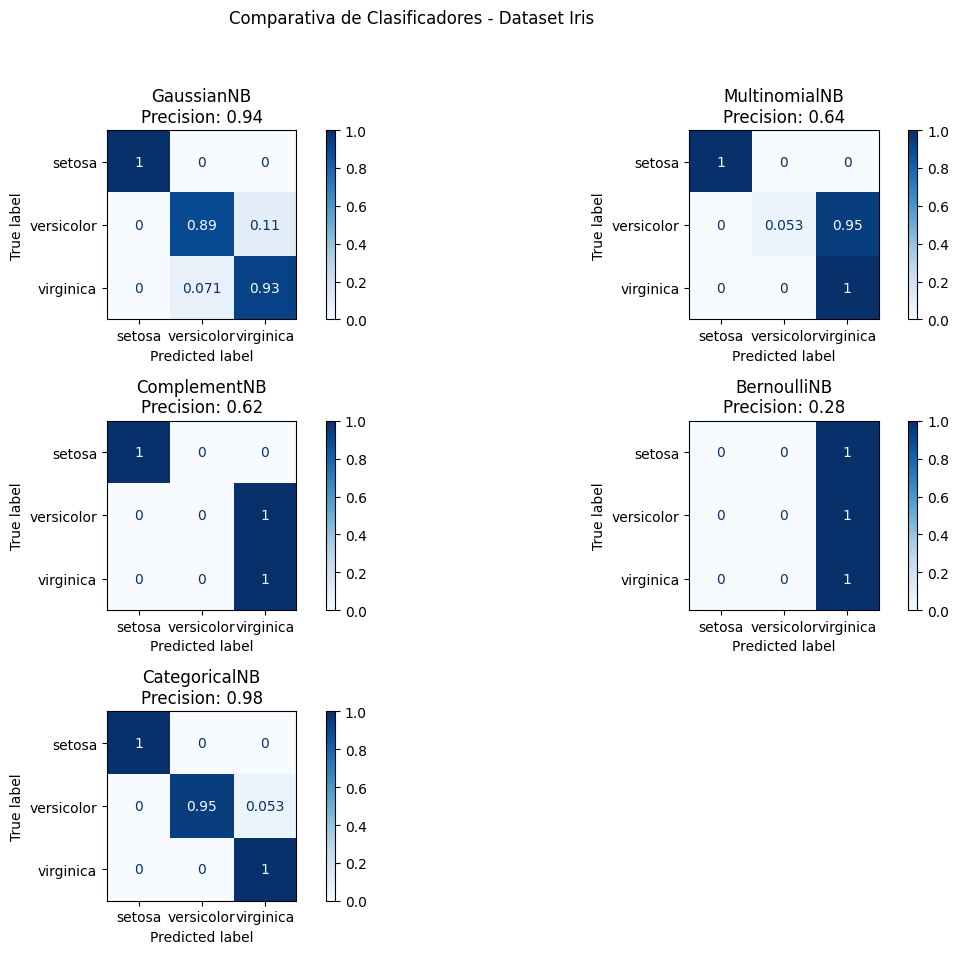

In [2]:
# Evaluar clasificadores para Iris
evaluate_classifiers(Xtrain_iris, Xtest_iris, ytrain_iris, ytest_iris, "Iris")

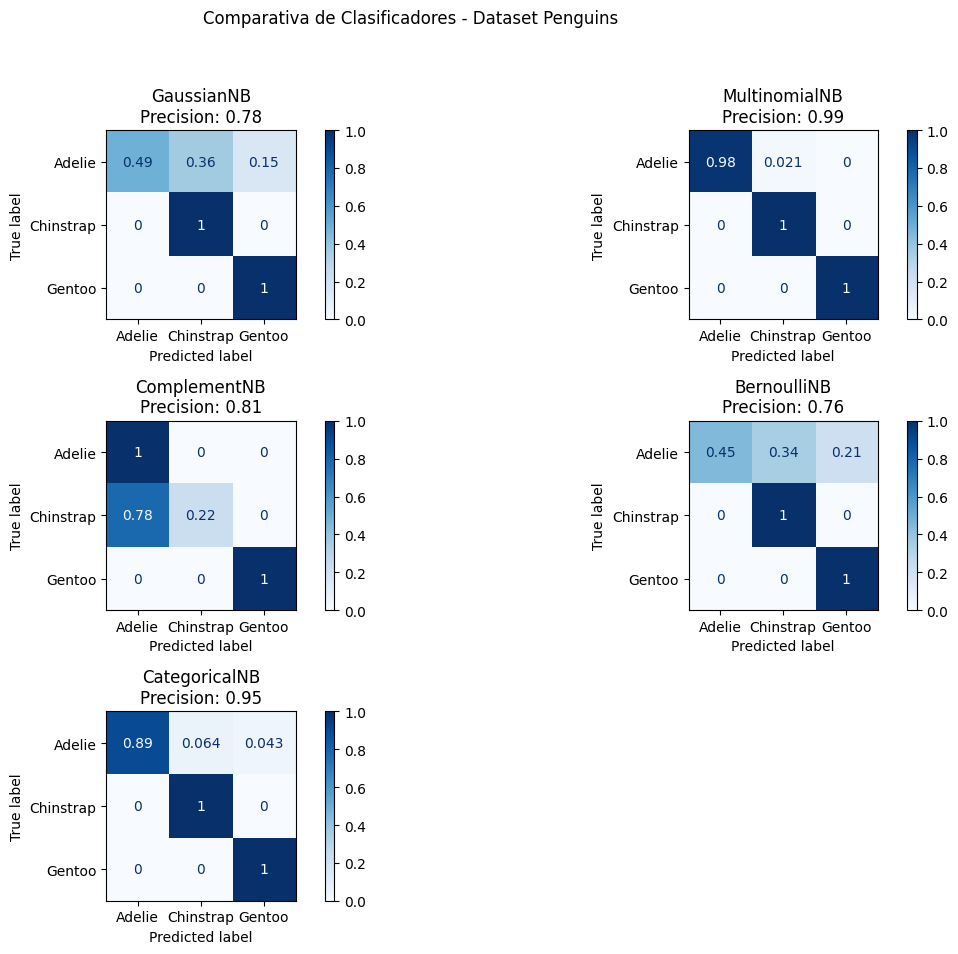

In [3]:
# Evaluar clasificadores para Penguins
evaluate_classifiers(Xtrain_penguins, Xtest_penguins, ytrain_penguins, ytest_penguins, "Penguins")